In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'C:/Users/OFFICE/Data_visualization/Gold_prediciton/goldstock v1.csv'
gold_stock_data = pd.read_csv(file_path)

In [3]:
# Convert the 'Date' column to datetime
gold_stock_data['Date'] = pd.to_datetime(gold_stock_data['Date'])

In [4]:
# Set the 'Date' column as the index
gold_stock_data.set_index('Date', inplace=True)

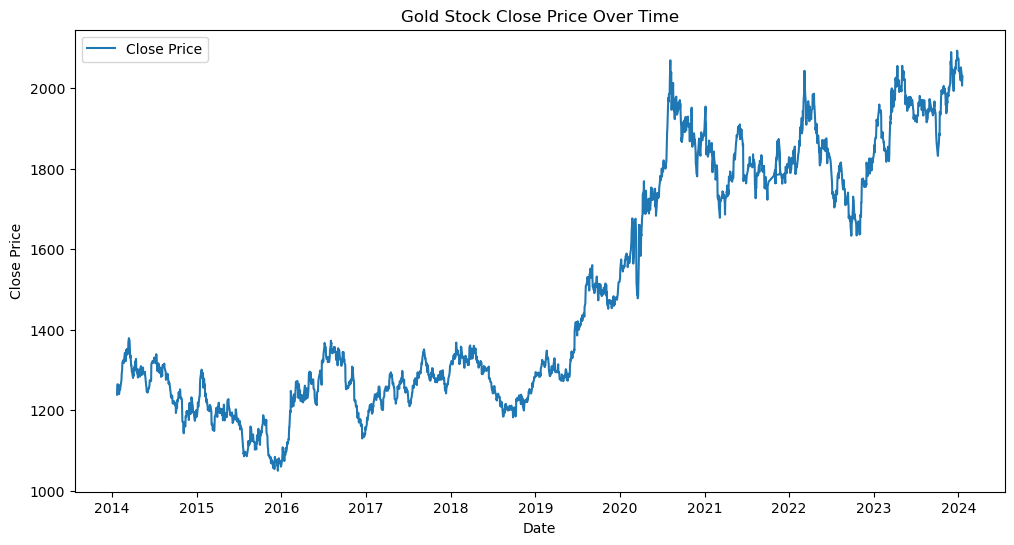

In [5]:
# Plot the 'Close' price to visualize the trend over time
plt.figure(figsize=(12, 6))
plt.plot(gold_stock_data['Close'], label='Close Price')
plt.title('Gold Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

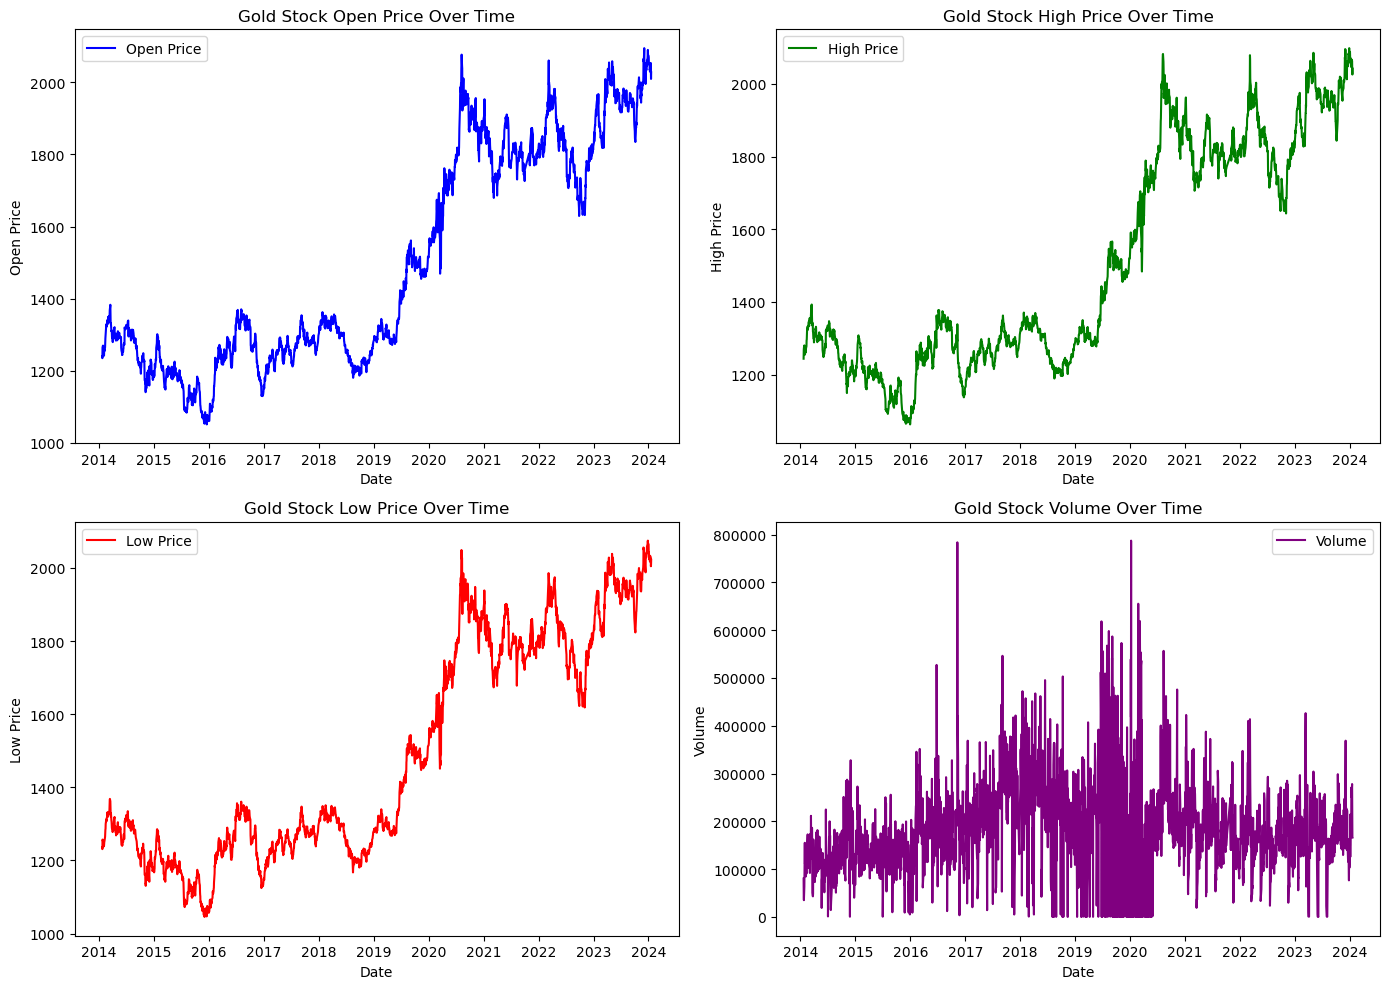

In [6]:
# Plot other aspects of the dataset
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Open Price
axs[0, 0].plot(gold_stock_data['Open'], label='Open Price', color='blue')
axs[0, 0].set_title('Gold Stock Open Price Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Open Price')
axs[0, 0].legend()

# High Price
axs[0, 1].plot(gold_stock_data['High'], label='High Price', color='green')
axs[0, 1].set_title('Gold Stock High Price Over Time')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('High Price')
axs[0, 1].legend()

# Low Price
axs[1, 0].plot(gold_stock_data['Low'], label='Low Price', color='red')
axs[1, 0].set_title('Gold Stock Low Price Over Time')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Low Price')
axs[1, 0].legend()

# Volume
axs[1, 1].plot(gold_stock_data['Volume'], label='Volume', color='purple')
axs[1, 1].set_title('Gold Stock Volume Over Time')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Volume')
axs[1, 1].legend()

plt.tight_layout()
plt.show()



In [7]:
# Fit the ARIMA model on the 'Close' price
model = ARIMA(gold_stock_data['Close'], order=(5, 1, 0))
model_fit = model.fit()

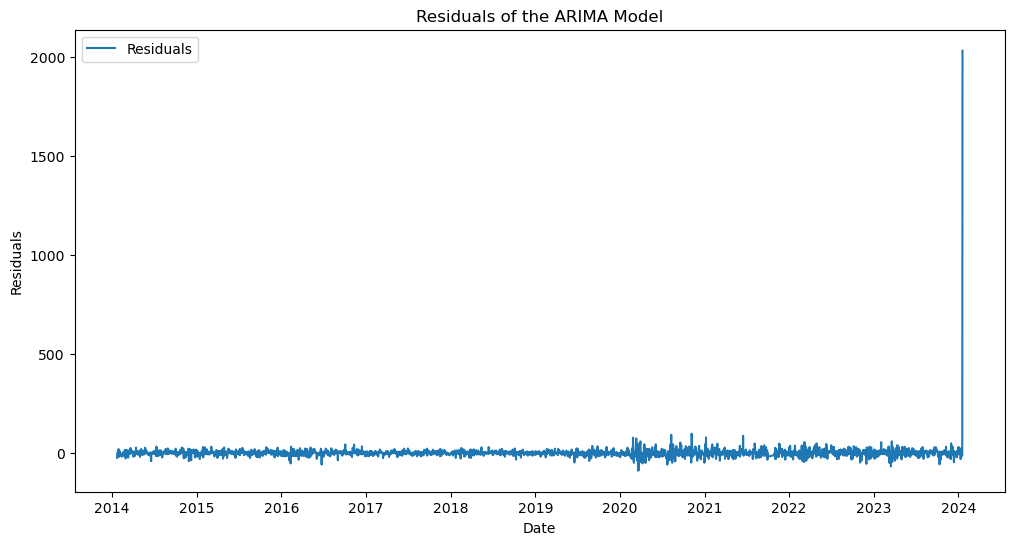

In [8]:
# Get the residuals
residuals = model_fit.resid

# Plot the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

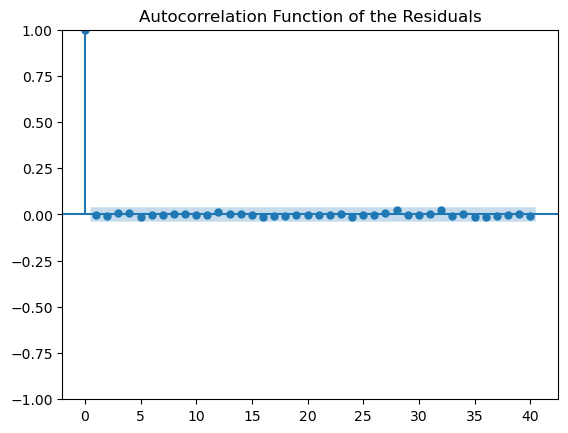

In [9]:
# Plot the ACF of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40)
plt.title('Autocorrelation Function of the Residuals')
plt.show()

In [10]:
# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test:")
print(lb_test)

Ljung-Box Test:
     lb_stat  lb_pvalue
10  1.227643   0.999563


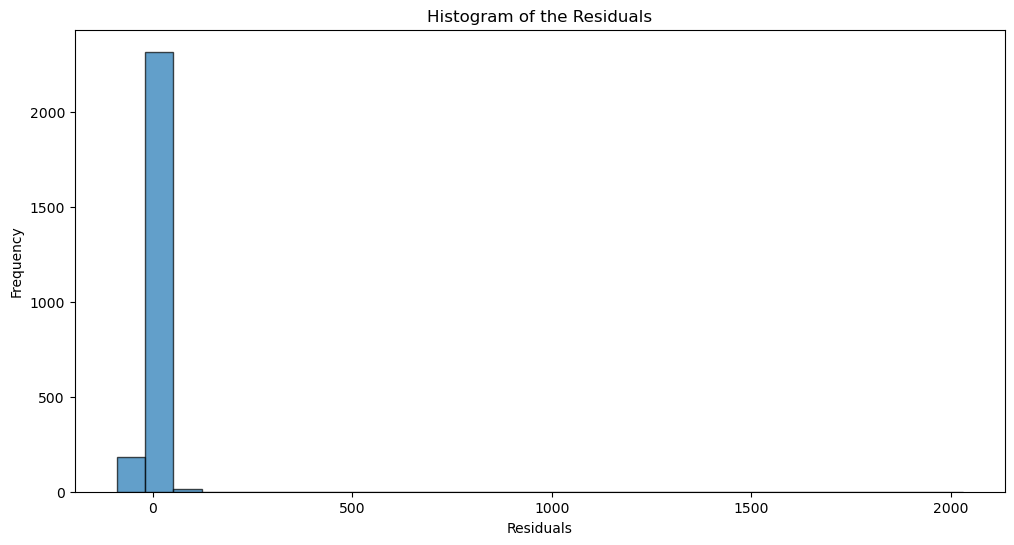

In [11]:
# Plot a histogram of the residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of the Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Calculate accuracy metrics
# Split data into train and test sets
train_size = int(len(gold_stock_data) * 0.8)
train, test = gold_stock_data['Close'][:train_size], gold_stock_data['Close'][train_size:]

# Fit the model on the training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 115.70578365871351
Mean Squared Error (MSE): 18462.50127821731
Root Mean Squared Error (RMSE): 135.8767871206017


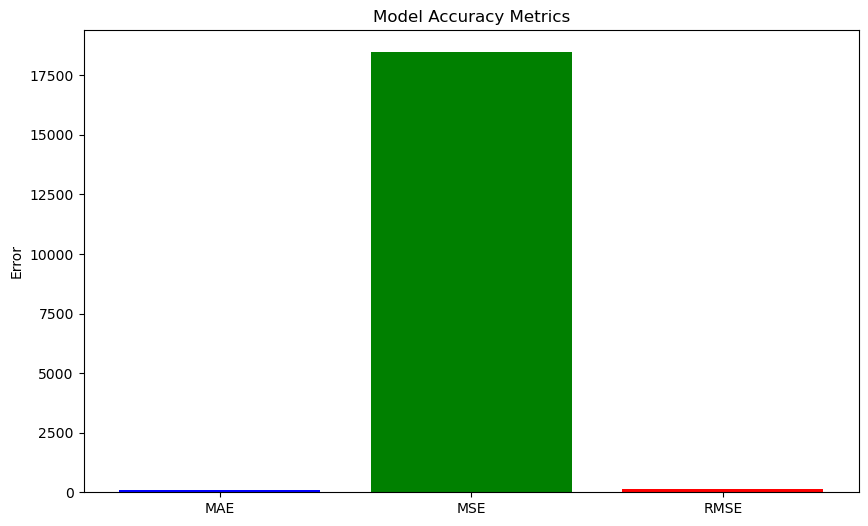

In [13]:
# Plot MAE, MSE, RMSE
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Metrics')
plt.ylabel('Error')
plt.show()

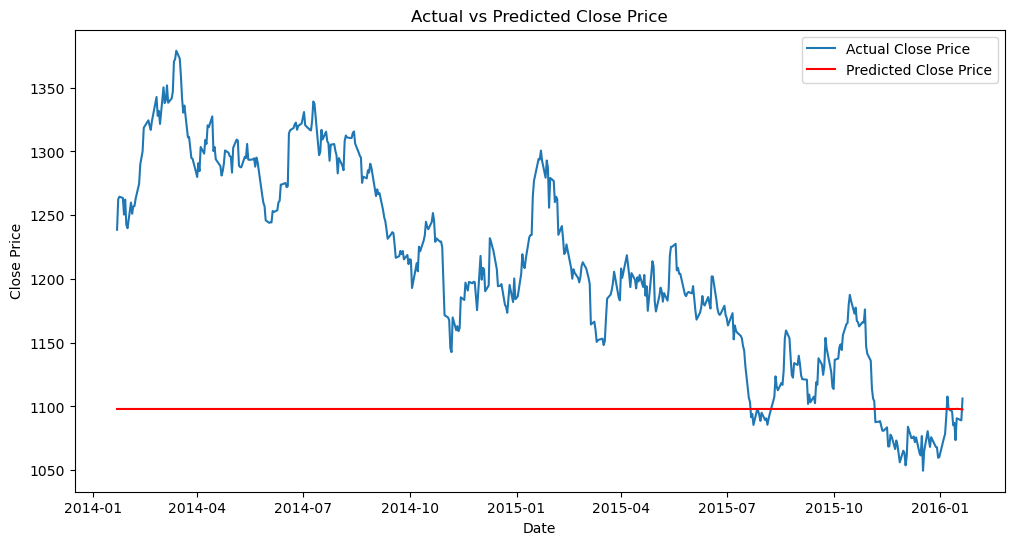

In [14]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Close Price')
plt.plot(test.index, predictions, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()